# DOPP 2021W Exercise 2

### Before you get started, please read the instructions in this notebook carefully.

## Preliminaries

- Please use only Python **version 3.6 or higher**. It is recommended to run the notebook on the JupyterHub. 


- This notebook will be scored using [nbgrader](https://nbgrader.readthedocs.io/en/stable/index.html). 
- Please use the code stubs provided, add and modify your code only at the provided markers, do not rename any functions. 
- Make sure that your assignment executes without any errors on the JupyterHub before submitting it. Submissions that do not execute will not be accepted.
- Do not change cell tags, as this may mess up the Validation and auto-grading features.


The submission deadline is **29.11.2021 23:55.**

Sections marked with `# YOUR CODE HERE` must be used to implement the functionality.
Cells containing `YOUR ANSWER HERE` must be used to fill in textual answers.

There is a total of 100 points that can be reached.

You might be awarded additional points for **good code quality**.

In [1]:
# Note: The only imports allowed are Python's standard library, pandas, numpy, scipy, matplotlib and scikit-learn
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import re

# add imports as needed
# import sklearn...


## Goal

In this exercise, you will 
 * use `pandas` to read, prepare and transform data,
 * use `matplotlib` to visually analyse data,
 * use `scikit-learn` to build prediction models.


The goal of this exercise is to model the relationship between weather observations and the prevalence of new influenza infections.

To investigate a potential relationship, we will use two datasets:
 * hourly [weather observation data](https://dane.imgw.pl/#dane-archiwalne) in [Łódź](https://en.wikipedia.org/wiki/%C5%81%C3%B3d%C5%BA), Poland (2010-2020)
 * weekly reports on [new influenza infections](https://www.gov.pl/web/wsse-lodz/zachorowania-na-grype) in Łódź (2010-2021).

The data to be used can be found in the subdirectory named `data`. 

To complete this exercise, you will have to:
* prepare the data, which (at minimum) involves the following:
    - handling missing values,
    - handling outliers
    - temporal alignment (i.e. convert hourly weather data to weekly data using appropriate aggregation functions and then merging with influenza data),
* analyse the data:
    - compare descriptive statistics,
    - visually investigate the raw data to gain an understanding of the data, identify patterns, outliers etc.,
    - look at the relationship between the variables of interest,
* model the relationship:
    - fit a model that predicts new infections from weather observation data.
    
    
**Note:** In case you encounter problems with loading and processing the data (tasks 1-5), we will provide you also with a pickled version of preprocessed and merged datasets that you can use to complete the remaining parts of the exercise (tasks 6-8).

## Task 0: Data Examination

Maximum number of *extra* points for this task: **5**

- This is an open task, where you are free to show all the data examination and experimentations preceeding actual work on the assignment
- You can also include some preliminary plots and analysis of the data content which you used to solve remaining tasks
- You can create additional cells for this task


In [2]:
# YOUR CODE HERE


with open("data/weather/names.txt", "r") as f:
        header = f.read().splitlines()
header

['Station code',
 'Station name',
 'Year',
 'Month',
 'Day',
 'Hour',
 'Cloud base height CL CM encrypted [code]',
 'Measurement status HPOD',
 'Lower cloud base height  [m]',
 'Measurement status HPON',
 'Higher cloud base height [m]',
 'Measurement status HPOW',
 'Cloud base height text [description]',
 'Instrument measurement 1 (lower) [P]',
 'Instrument measurement 2 (higher) [P]',
 'Visibility [code]',
 'Measurement status WID',
 'Operator visibility [m]',
 'Measurement status WIDO',
 'Automatic visibility [m]',
 'Measurement status WIDA',
 'Cloud cover [oktas]',
 'Measurement status NOG',
 'Wind direction  [°]',
 'Measurement status KRWR',
 'Wind speed  [m/s]',
 'Measurement status FWR',
 'Wind gust  [m/s]',
 'Measurement status PORW',
 'Air Temperature [°C]',
 'Measurement status TEMP',
 'Wet-bulb temperature [°C]',
 'Measurement status TTZW',
 'Ventilation index [W/N]',
 'Ice index [L/W]',
 'Vapour pressure [hPa]',
 'Measurement status CPW',
 'Relative humidity [%]',
 'Measurem

In [3]:

data_glob = glob.glob("data/weather/*.csv")
test_weather_file = data_glob[0]
pd.read_csv(test_weather_file, names=header)



,Station code,Station name,Year,Month,Day,Hour,Cloud base height CL CM encrypted [code],Measurement status HPOD,Lower cloud base height [m],Measurement status HPON,...,Freshly fallen snow cover height [cm],Measurement status HSS,Snow cover height in the plot [cm],Measurement status GRSN,Snow type [code],Shape of the cover [code],Sample height [cm],Measurement status HPRO,Sample weight [g],Measurement status CIPR
0,351190465,ŁÓDŹ,2014,1,1,0,6,NaN,1400,NaN,...,0,8.0,0,8.0,NaN,NaN,0,8.0,0,8.0
1,351190465,ŁÓDŹ,2014,1,1,1,3,NaN,210,NaN,...,0,8.0,0,8.0,NaN,NaN,0,8.0,0,8.0
2,351190465,ŁÓDŹ,2014,1,1,2,3,NaN,210,NaN,...,0,8.0,0,8.0,NaN,NaN,0,8.0,0,8.0
3,351190465,ŁÓDŹ,2014,1,1,3,1,NaN,90,NaN,...,0,8.0,0,8.0,NaN,NaN,0,8.0,0,8.0
4,351190465,ŁÓDŹ,2014,1,1,4,1,NaN,90,NaN,...,0,8.0,0,8.0,NaN,NaN,0,8.0,0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,351190465,ŁÓDŹ,2014,12,31,19,2,NaN,120,NaN,...,0,8.0,0,8.0,NaN,NaN,0,8.0,0,8.0
8756,351190465,ŁÓDŹ,2014,12,31,20,2,NaN,120,NaN,...,0,8.0,0,8.0,NaN,NaN,0,8.0,0,8.0
8757,351190465,ŁÓDŹ,2014,12,31,21,1,NaN,90,NaN,...,0,8.0,0,8.0,NaN,NaN,0,8.0,0,8.0
8758,351190465,ŁÓDŹ,2014,12,31,22,1,NaN,60,NaN,...,0,8.0,0,8.0,NaN,NaN,0,8.0,0,8.0


## Task 1: Load Data

Total number of points for completing this task: **20**

### Weather observations

As a first step, implement the method `load_weather_data()`, which should read all individual (yearly) datasets from the csv files in `data\weather\` into a single `pd.DataFrame` and return it. 

- make sure that you load all the data (2010-2020)
- make sure that all columns are appropriately named, use `data\weather\names.txt` file to fill in column names
- from the `Year`, `Month`, `Day` and `Hour` columns create column `Date` and `Week`, where `Date` is a [`pandas.Timestamp`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html) object and `Week` contains the week number of the date. Use Pandas built-in datetime handling features.
- create a `MultiIndex` from the date columns with the following hierarchy: `Year` - `Month` - `Week` - `Day` - `Hour` (make sure to label them accordingly)


**Hints:**
 
 - LOOK at the data in the original files
 - It is advisable not to append each data set individually, but to read each data frame, store it into a list and  combine them once at the end.
 - Your resulting data frame should look as follows:

![Weather data frame example](weather_data_dataframe_sample.png)

In [4]:



def load_weather_data():
    """
    Load all weather data files and combine them into a single Pandas DataFrame.
    Add a week column and a hierarchical index (year, month, week, day)

    Returns
    --------
    weather_data: data frame containing the weather data
    """
    def check_header_uniqueness(header: list):
        if len(header) != len(set(header)):
            raise ValueError("Header contains duplicate names!")
            
    with open("data/weather/names.txt", "r") as f:
        header = f.read().splitlines()
    check_header_uniqueness(header)

    data_glob = glob.glob("data/weather/*.csv")
    # low_memory: bool, default True
    # Internally process the file in chunks, resulting in lower memory use while parsing, but possibly mixed type inference. To ensure no mixed types either set False, or specify the type with the dtype parameter. Note that the entire file is read into a single DataFrame regardless, use the chunksize or iterator parameter to return the data in chunks. (Only valid with C parser).
    #
    # pandas warned that it infered mixed types when using the chunked file loading.
    # To avoid this potential problem, I set low_memory to false. The files are roughly 3MB big, so this shouldn't be an issue here!
    weather_data = pd.concat(
        [
            pd.read_csv(data_file, names=header, low_memory=False)
            for data_file in data_glob
        ]
    )

    date_cols = ["Year", "Month", "Day", "Hour"]

    for col in date_cols:
        print(f"Is {col} in weather_data: {col in weather_data.columns}")

    # Add week column
    weather_data["Week"] = pd.to_datetime(
        weather_data[date_cols]
    )
    weather_data["Week"] = weather_data["Week"].dt.isocalendar().week

    # Setup multi index
    weather_data = weather_data.set_index(["Year", "Month", "Week", "Day", "Hour"])

    return weather_data


data_weather = load_weather_data()

data_weather


Is Year in weather_data: True
Is Month in weather_data: True
Is Day in weather_data: True
Is Hour in weather_data: True


Station code Station name  \
Year Month Week Day Hour                              
2014 1     1    1   0        351190465         ŁÓDŹ   
                    1        351190465         ŁÓDŹ   
                    2        351190465         ŁÓDŹ   
                    3        351190465         ŁÓDŹ   
                    4        351190465         ŁÓDŹ   
...                                ...          ...   
2017 12    52   31  19       351190465         ŁÓDŹ   
                    20       351190465         ŁÓDŹ   
                    21       351190465         ŁÓDŹ   
                    22       351190465         ŁÓDŹ   
                    23       351190465         ŁÓDŹ   

                         Cloud base height CL CM encrypted [code]  \
Year Month Week Day Hour                                            
2014 1     1    1   0                                           6   
                    1                                           3   
                    2                                           3   
                    3                                           1   
                    4                                           1   
...                                                           ...   
2017 12    52   31  19                                          3   
                    20                                          2   
                    21                                          6   
                    22                                          6   
                    23                                          6   

                          Measurement status HPOD  \
Year Month Week Day Hour                            
2014 1     1    1   0                         NaN   
                    1                         NaN   
                    2                         NaN   
                    3                         NaN   
                    4                         NaN   
...                                           ...   
2017 12    52   31  19                        NaN   
                    20                        NaN   
                    21                        NaN   
                    22                        NaN   
                    23                        NaN   

                          Lower cloud base height  [m]  \
Year Month Week Day Hour                                 
2014 1     1    1   0                             1400   
                    1                              210   
                    2                              210   
                    3                               90   
                    4                               90   
...                                                ...   
2017 12    52   31  19                             200   
                    20                             150   
                    21                            1030   
                    22                            1300   
                    23                            1480   

                          Measurement status HPON  \
Year Month Week Day Hour                            
2014 1     1    1   0                         NaN   
                    1                         NaN   
                    2                         NaN   
                    3                         NaN   
                    4                         NaN   
...                                           ...   
2017 12    52   31  19                        NaN   
                    20                        NaN   
                    21                        NaN   
                    22                        NaN   
                    23                        NaN   

                          Higher cloud base height [m]  \
Year Month Week Day Hour                                 
2014 1     1    1   0                                0   
                    1                                0   
                    2                        

In [5]:
assert data_weather.shape[0] == 96432
assert data_weather.shape[1] > 102

# additional tests

In [6]:
# hidden tests

**Q** Which combination of year+week has the lowest number of entries? You should find the respective entry/entries using pandas. Return the first answer if there is more than one combination fulfilling these criteria.

In [7]:
# fill your answer into these variables
year = 0 
week = 0
# YOUR CODE HERE
        
def find_full_column(df):
    missing_value_counts = df.isnull().sum()
    if missing_value_counts.min() == 0:
        return missing_value_counts.idxmin()
    else:
        return None

col = find_full_column(data_weather)

df_num_entries = data_weather.groupby(["Year", "Week"]).count()
year, week = df_num_entries[col].idxmin()
num_entries = df_num_entries[col].min()
print(f"Year {year}, week {week} has the fewest entries with: {num_entries}")

Year 2010, week 53 has the fewest entries with: 72


In [8]:
# hidden tests

### Influenza infections

Load and prepare the second dataset (`data/influenza/influenza.csv`), which contains the number of new influenza infections on a weekly basis, as follows:

- Stack all seasonal data into one column
- Convert months written in roman numerals to arabic numbers (II -> 2) and save them into `Month` column
- For each entry extract year based on the season and month values
- Extract week data into column `Week`
- Create a `MultiIndex` from the `Year` and `Week` columns
- Rename column containing influenza cases as `Influenza_cases`
- Make sure that all columns are appropriately typed
- Remove rows with missing infection counts
- Your resulting data frame should look as follows:

![Example data frame](influenza_data_dataframe_sample.png)

In [73]:
def load_influenza_data():
    """ 
    Load and prepare the influenza data file
    
    Returns
    --------
    influenza_data: data frame containing the influenza data
    """
    # YOUR CODE HERE

    month_conversion = {
        "I": 1,
        "II": 2,
        "III": 3,
        "IV": 4,
        "V": 5,
        "VI": 6,
        "VII": 7,
        "VIII": 8,
        "IX": 9,
        "X": 10,
        "XI": 11,
        "XII": 12,
    }

    data_path = "data/influenza/influenza.csv"
    
    influenza_data = pd.read_csv(data_path, header=0)
    influenza_data["Month"] =  influenza_data["week"].apply(lambda entry: month_conversion[entry.split(".")[1]])
    influenza_data["Week"] =  influenza_data["week"].apply(lambda entry: int(entry.split(".")[0]))
    # Column 'week' will later not be copied

    # Extract columns with 'season' in them
    seasons = [col for col in influenza_data.columns if "season" in col]

    # functions to extract the correct year out of 'season' and 'month'
    def extract_years(season:str):
        return re.findall("([0-9]{4})", season)

    def which_year(month:int):
        if month > 8:
            return 0
        return 1

    # Construct new dataframes 
    df_list = []
    for season in seasons:
        years = list(map(int, extract_years(season)))
        if len(years) != 2:
            print("error")
        df = influenza_data[["Week", "Month", season]]
        # print(df)
        # df.loc[:,"Year"] 
        df["Year"] = df.apply(lambda row: years[which_year(row.Month)], axis=1 )
        # df.loc[:,"Year"] = df.apply(lambda row: print(row.Month), axis=1)
        # # df["Year"].transform(lambda x: years[which_year(x)] )
        df = df.rename(columns={season: "Influenza_cases"})
        df = df.set_index(["Year", "Week"])
        df_list.append(df)

    # Construct final aggregated dataframe
    influenza_data = pd.concat(df_list).sort_index()
    influenza_data = influenza_data.dropna(axis=0)

    influenza_data = influenza_data.convert_dtypes()

    return influenza_data

data_influenza = load_influenza_data()
# Describe is usefull for checking ranges and such of data.
data_influenza.describe()

/tmp/ipykernel_48019/3371773857.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year"] = df.apply(lambda row: years[which_year(row.Month)], axis=1 )


,Month,Influenza_cases
count,356.000000,356.000000
mean,6.528090,4873.362360
std,4.144135,3945.096201
min,1.000000,16.000000
25%,3.000000,2070.000000
50%,9.000000,4225.500000
75%,10.000000,5952.750000
max,12.000000,25194.000000


In [74]:

data_influenza.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 356 entries, (2010, 37) to (2021, 40)
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Month            356 non-null    Int64
 1   Influenza_cases  356 non-null    Int64
dtypes: Int64(2)
memory usage: 9.0 KB


<AxesSubplot:xlabel='Year,Week'>

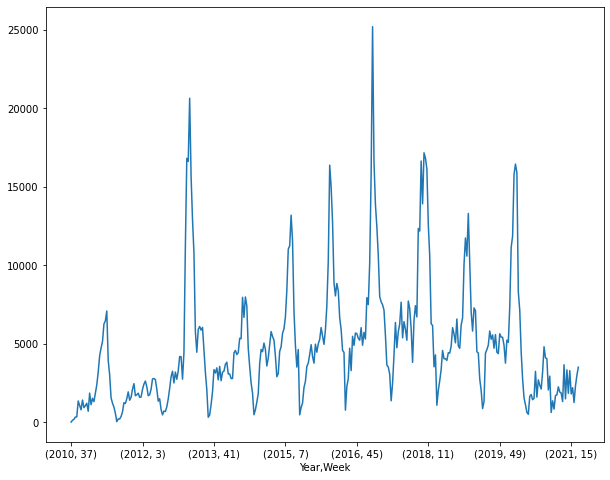

In [75]:
# Visual check for any weird entries, i.e. way too large (>1e+6) or small (e.g. <0)
# Lodz has a population of roughly 650, 000 people, so I would be suspicious if values in the 6 digit range show up here (i.e. 1/6 of the population would be infected with influenza at once).
# The peaks with >25,000 cases are already quite high but seem reasonable.
plt.figure(figsize=(10,8))
data_influenza["Influenza_cases"].plot()

In [76]:
assert data_influenza.shape == (356, 2)
# additional tests


In [77]:
# hidden tests

**Q:** Which combination of year+week shows the highest number of infections? You should find the respective entry/entries using pandas. Return the first answer if there is more than one combination fulfilling these criteria.

In [78]:
# fill your answer into these variables
year = 0 
week = 0

# YOUR CODE HERE
        
year, week = data_influenza["Influenza_cases"].idxmax()
max_cases = data_influenza["Influenza_cases"].max()
print(f"Year {year}, week {week} has the highest number of infections with: {max_cases}")

Year 2017, week 4 has the highest number of infections with: 25194


In [79]:
# hidden tests

**Q:** Which combination of year+month shows the highest number of infections? You should find the respective entry/entries using pandas. Return the first answer if there is more than one combination fulfilling these criteria.

In [80]:
# fill your answer into these variables
year = 0 
month = 0

# YOUR CODE HERE
df = data_influenza.copy().groupby(["Year", "Month"]).sum()

year, month = df["Influenza_cases"].idxmax()
max_cases = df["Influenza_cases"].max()
print(f"Year {year}, month {month} has the highest number of infections with: {max_cases}")

df.loc[year,:]



Year 2013, month 1 has the highest number of infections with: 65301


,Influenza_cases
Month,
1,65301
2,45099
3,22343
4,15902
9,3861
10,12663
11,12654
12,13672


In [81]:
df.sort_values(by=["Influenza_cases"], ascending=False)

,,Influenza_cases
Year,Month,
2013,1,65301
2018,2,59884
2017,1,58664
2018,3,56152
2020,2,55228
...,...,...
2013,9,3861
2010,10,3572
2012,9,2855


In [ ]:
# hidden tests

## Task 2: Handling Missing Values

Total number of points for completing this task: **15**

If you take a closer look at the data, you will notice that a few of the observations are missing.

There is a wide range of standard strategies to deal with such missing values, including:

- row deletion
- substitution methods (e.g., replace with mean or median)
- hot-/cold-deck methods (impute from a randomly selected similar record)
- regression methods

To decide which strategy is appropriate, it is essential to investigate the mechanism that led to the missing values to find out whether the missing data is missing completely at random, missing at random, or missing not at random. 

 - **MCAR** (Missing Completely At Random) means that there is no relationship between the missingness of the data and any of the values.
 - **MAR** (Missing At Random) means that there is a systematic relationship between the propensity of missing values and the observed data, but not the missing data.
 - **MNAR** (Missing Not At Random) means that there is a systematic relationship between the propensity of a value to be missing and its values. 
 

_______

You talked to the meteorologists who compiled the data to find out more about what mechanisms may have caused the missing values. 

They told you that they do not know why some of the temperature (`Air Temperature [°C]`) and pressure (`Surface pressure [hPa]` and `Mean sea-level pressure [hPa]`) readings are missing, but someone may have forgotten to record them. In any case, the propensity of temperature and pressure values to be missing does not have anything to do with the weather itself.

As far as the missing humidity readings are concerned (`Relative humidity [%]`), according to their experience, they suspect that the humidity sensor is less reliable when the wind blows directly from the West.

Check the plausibility of these hypotheses in the data, consider the implications, and devise an appropriate strategy to deal with the various missing values.

You also received an additional file from the meteorologists: `data\weather\description.txt` that contains description of the columns. According to that file, if data in a column called `Measurement status _X_` contains a specific code (either 8 or 9) then the preceding column value is not reliable. For example, when value for `Measurement status PORW` is equal to 8 or 9, then readings for `Wind gust  [m/s]` column should be treated as missing.


Because of the sensitivity of the sensor, wind gust data is unavailable for many records. Meteorologists tell you, that for this station, missing wind gust data could be easily approximated by multiplying standard wind speed (`Wind speed  [m/s]`) by a factor o 1.55.


- Handle missing values for the following columns: `Air Temperature [°C]`, `Surface pressure [hPa]`, `Mean sea-level pressure [hPa]`, `Relative humidity [%]` and `Wind gust  [m/s]`
- For the remaining columns, especially `Measurement status _X_`, it is ok to fill the missing values with 0

To implement your strategy, you can use a range of standard mechanisms provided by Pandas, by implementing `handle_missingValues_simple`, or implement a custom strategy (for extra points, by implementing `handle_missingValues_advanced`).

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
def handle_missingValues_simple(incomplete_data):
    """ 
    Parameters
    --------
    incomplete_data: data frame containing missing values 
    
    Returns
    --------
    complete_data: data frame not containing any missing values
    """
    # YOUR CODE HERE
    raise NotImplementedError()
    return complete_data


def handle_missingValues_advanced(incomplete_data):
    """ 
    Parameters
    --------
    data: data frame containing missing values 
    
    Returns
    --------
    data: data frame not containing any missing values
    """
    # YOUR CODE HERE
    raise NotImplementedError()
    
    return complete_data
    
data_weather_complete = handle_missingValues_simple(data_weather)

In [ ]:
# hidden tests

In [ ]:
# hidden tests

In [ ]:
# hidden tests

###  Discussion

#### Pros and Cons of strategies for dealing with missing data

In the cell provided below, discuss the PROs and CONs of various strategies (row deletion, imputation, hot deck methods etc.) for dealing with missing data. Discuss when it is appropriate to use each method.

YOUR ANSWER HERE

#### Your chosen strategy <span style="color:blue">

Explain your chosen strategy for dealing with missing values for the various attributes in the cell below.


YOUR ANSWER HERE

## Task 3: Handling Outliers
Total number of points for completing this task: **10**

If you take a closer look at some of the observations, you should notice that some of the temperature values are not particularly plausible (hint: plotting histograms of the distributions helps). Hypothesize on the nature of these outliers and implement a strategy to handle them.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
def handle_outliers(noisy_data):
    """
    Parameters
    --------
    noisy_data: data frame that contains outliers
    
    Returns
    --------
    cleaned_data: data frame with outliers
    """
    # YOUR CODE HERE
    raise NotImplementedError()
    
    return cleaned_data
    
data_weather_cleaned = handle_outliers(data_weather_complete)

In [ ]:
# hidden tests

In [ ]:
# hidden tests

In [ ]:
# hidden tests

#### Your chosen strategy

In the cell below, explain your chosen strategy for dealing with outliers.


YOUR ANSWER HERE

## Task 4: Aggregate values
Total number of points for completing this task: **5**

Aggregate the observations on a weekly basis. Return a data frame with a hierarchical index (levels `year` and `week`) on the vertical axis and the following weekly aggregations as columns:

- `temp_weeklyMin`: minimum of `Air Temperature [°C]`
- `temp_weeklyMax`: <span style="color:red">max</span> of `Air Temperature [°C]`
- `temp_weeklyMean`: mean of `Air Temperature [°C]`
- `temp_weeklyMedian`: median of `Air Temperature [°C]`


- `precip_weeklyMin`: min of `Precipitation past 6 hours [mm]`
- `precip_weeklyMax`: max of `Precipitation past 6 hours [mm]`
- `precip_weeklyMean`: mean of `Precipitation past 6 hours [mm]`


- `hum_weeklyMin`: min of `Relative humidity [%]`
- `hum_weeklyMax`: max of `Relative humidity [%]`
- `hum_weeklyMean`: mean of `Relative humidity [%]`


- `wind_weeklyMean`: mean of `Wind speed  [m/s]`
- `wind_weeklyMax`: max of `Wind speed  [m/s]`
- `gust_weeklyMax`: max of `Wind gust  [m/s]`


**Note:** You can create more aggregation columns (for extra points), as depending on selected algorithm, other features might be more informative for prediction.

**Note2:** Attentive data scientists might have noticed a problem with isocalendars when aggregating on `Year` and `Week`. You can ignore this for the purpose of this lecture. In real-world settings you might consider addressing this issue, depending on your task and data

In [ ]:
def aggregate_weekly(data):
    """ 
    Parameters
    --------
    data: weather data frame
    
    Returns
    --------
    weekly_stats: data frame that contains statistics aggregated on a weekly basis
    """
    weekly_weather_data = pd.DataFrame()
    # YOUR CODE HERE
    raise NotImplementedError()
    
    return weekly_weather_data

data_weather_weekly = aggregate_weekly(data_weather_cleaned)

In [ ]:
# hidden tests

## Task 5: Merge influenza and weather datasets
Total number of points for completing this task: **5**

Merge the `data_weather_weekly` and `data_influenza` datasets. Beware that both datasets contain rows that do not appear in the other dataset.

In [ ]:
def merge_data(weather_df, influenza_df):
    """ 
    Parameters
    --------
    weather_df: weekly weather data frame
    influenza_df: influenza data frame
    
    Returns
    --------
    merged_data: merged data frame that contains both weekly weather observations and prevalence of influence infections
    """
    # YOUR CODE HERE
    raise NotImplementedError()

    return merged_data

data_merged = merge_data(data_weather_weekly, data_influenza)

In [ ]:
data_merged.head()

In [ ]:
# hidden tests

## Processed and merged data: shortcut for Tasks 6-8

If you encounter problems with the first five tasks, you can uncomment and use the following code to load pickled `DataFrame` containing already merged and preprocessed weather and influenza datasets. You can use this data to complete tasks 6-8. 

In [ ]:
# import pickle

# with open("data/data_merged.pickle","rb") as fp:
#     data_merged = pickle.load(fp)

## Task 6: Visualization
Total number of points for completing this task: **15**

To better understand the dataset, create visualisations of the merged data using `matplotlib` that help explore potential relationships between the variables before developing a model.


**Note:** Hand in multiple figures. Use a proper naming configuration for the image files. Your plots should present information clearly (i.e. include titles, axis labels, legends,.. -> http://imgs.xkcd.com/comics/convincing.png). You should also describe which insights you gained from the figures.

**Note 2:** Choice of a proper chart type is essential. Points might be subtracted when using inappropriate plots and descriptions, so please *do not* just use all possible plotting functions from `matplotlib` without understanding and justification.

**Note 3:** You can also use `pandas` and `seaborn` python packages to create the plots.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# hidden tests

#### Findings 
Summarize your findings.

YOUR ANSWER HERE

## Task 7: Influenza prediction model 
Total number of points for completing this task: **20**


Build and train a model using weather and influenza data from 2010 until 2020 using `scikit-learn`.

Please structure and document your code so that it is easy to follow.

 - Choose appropriate machine learning algorithm(s) for the problem at hand
 - Experiment with different features and feature selection methods
 - Make sure your results are reproducible
 - Don't hesitate to go back to previous steps if you notice any data quality issues
 - If your chosen algorithm has specific parameters, explore their effect with different settings using 10-fold cross-validation
 - Experiment with different training/test splits
 - If appropriate, try different scaling approaches (min/max, z-score,..).
 - Present your results (e.g. by plotting predicted against true values)
 
 
 - How good does your model fit when you evaluate it with the validation data set?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

#### Approach and algorithm
Motivate your approach and choice of algorithm in the cell below

YOUR ANSWER HERE

## Task 8: Test model on last weeks of 2020/2021 season
Total number of points for completing this task: **10**

Load weather data for corresponding `Station code` for <span style="color:red">January-April 2021</span> from `data/prediction/` and test the quality of your model with `data_influenza`.


**Note:** This data is encoded with 'Central European (Windows 1250)' encoding.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

#### Findings 
Summarize your findings and lessons learned.

YOUR ANSWER HERE